# Parte Calificada: Marko Talledo - 20162271

In [39]:
# Instalamos los paquetes, importamos data y paquetes
install.packages("MASS")
install.packages("mlbench")
library(MASS)      #librería para función lda (usada en sección LDA Bayesiano)
library(readxl)    #librería para leer .xlsx
library(mlbench)   #librería para obtener el dataset Vehicle (usada en sección LDA para varias clases)
source("crossval.R")

Installing MASS [7.3-58.1] ...
	OK [linked cache]
Installing mlbench [2.1-3] ...
	OK [linked cache]


In [40]:
#Leemos los datos
PDF <- read.csv(file = 'Placement_Data_Full_Class.csv')

In [41]:
# Target: status
head(PDF)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>
1,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


In [42]:
# Convertimos a Dataframe
PDF = data.frame(PDF)

In [43]:
 PDF$status_target = ifelse(PDF$status == "Placed","P", "N")

In [44]:
#Separando el conjunto de datos en dos grupos
placed   =PDF[PDF$status == "Placed",] 
head(placed)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,status_target
,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
1,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000,P
2,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000,P
3,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000,P
5,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000,P
8,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000,P
9,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000,P


In [46]:
#Separando el conjunto de datos en dos grupos
not_placed   =PDF[PDF$status == "Not Placed",] 
head(not_placed)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,status_target
,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>
4,4,M,56,Central,52.0,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NA,N
6,6,M,55,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NA,N
7,7,F,46,Others,49.2,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NA,N
10,10,M,58,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NA,N
13,13,F,47,Central,55.0,Others,Science,65.00,Comm&Mgmt,No,62.00,Mkt&HR,65.04,Not Placed,NA,N
15,15,M,62,Central,47.0,Central,Commerce,50.00,Comm&Mgmt,No,76.00,Mkt&HR,54.96,Not Placed,NA,N


In [47]:
#Hallando las medias  en ambos grupos
medp<-colMeans(placed[,c('mba_p','etest_p')], na.rm = TRUE)
medp 
medn<-colMeans(not_placed[,c('mba_p','etest_p')], na.rm = TRUE) 
medn 

mba_p  etest_p 
62.57939 73.23804

mba_p  etest_p 
61.61284 69.58791

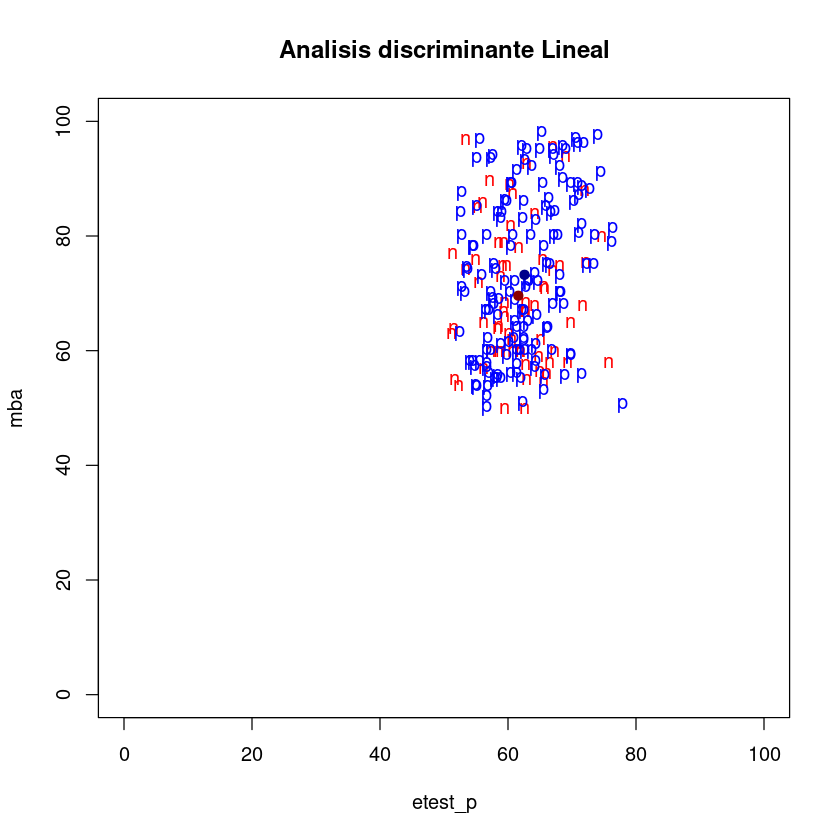

In [48]:
#Graficando los puntos y los centroides de cada grupo 
#win.graph() #Crea una ventana para gráficos (graphic device) y la deja como disposito activo, al cual se enviarán todos los dibujos.
plot(not_placed$mba_p,not_placed$etest_p,xlim=c(0,100),ylim=c(0,100),type="n",xlab="etest_p",ylab="mba") 
title("Analisis discriminante Lineal")
text(not_placed$mba_p,not_placed$etest_p,"n", col="red") 
text(placed$mba_p,placed$etest_p,"p",col="blue") 
points(medp[1],medp[2],pch=19,col="dark blue") 
points(medn[1],medn[2],pch=19,col="dark red") 


In [49]:
#Calculo de la linea de decisión
#Hallando las matrices de covarianzas en ambos grupos 
cov1<-cov(placed[,c('mba_p','etest_p')]) 
cov1 
cov2<-cov(not_placed[,c('mba_p','etest_p')]) 
cov2  

,mba_p,etest_p
mba_p,34.62832,22.95634
etest_p,22.95634,188.49458


,mba_p,etest_p
mba_p,32.554884,1.159298
etest_p,1.159298,142.341280


In [50]:
#Calculando los coeficientes de la función discriminante 
covcomb=((dim(placed)[1]-1)*cov1+(dim(not_placed)[1]-1)*cov2)/(dim(placed)[1]+dim(not_placed)[1]-2) 
covcomb
coeflda<-(medp-medn)%*%solve(covcomb) 
coeflda 

,mba_p,etest_p
mba_p,33.98584,16.20232
etest_p,16.20232,174.19356


mba_p,etest_p
0.01930629,0.01915871


In [51]:
#Calculando el termino independiente 
indlda<-0.5*(medp-medn)%*%solve(covcomb)%*%(medp-medn) 
indlda 

0.04429619


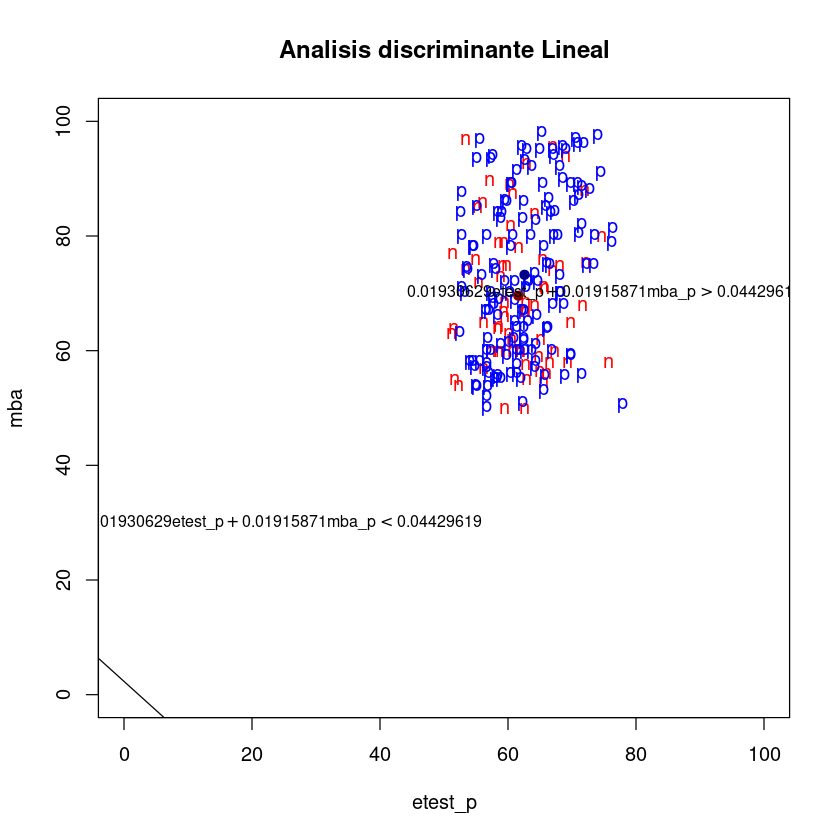

In [57]:
#Graficando los puntos y los centroides de cada grupo 
#win.graph() #Crea una ventana para gráficos (graphic device) y la deja como disposito activo, al cual se enviarán todos los dibujos.
plot(not_placed$mba_p,not_placed$etest_p,xlim=c(0,100),ylim=c(0,100),type="n",xlab="etest_p",ylab="mba") 
title("Analisis discriminante Lineal")
text(not_placed$mba_p,not_placed$etest_p,"n", col="red") 
text(placed$mba_p,placed$etest_p,"p",col="blue") 
points(medp[1],medp[2],pch=19,col="dark blue") 
points(medn[1],medn[2],pch=19,col="dark red") 
# Ploteando la linea discriminante en la forma pendiente-intercepto 
abline(indlda/coeflda[2],-coeflda[1]/coeflda[2]) 
text(25,30,bquote(.(coeflda[1])*etest_p+.(coeflda[2])*mba_p<.(indlda)),cex= .8)
text(75,70,bquote(.(coeflda[1])*etest_p+.(coeflda[2])*mba_p>.(indlda)),cex= .8)

mba_p,etest_p
0.01930629,0.01915871


In [ ]:
#---------------- 2.1 LDA Bayesiano con priors iguales -----------------

lda1<-lda(PDF$status~PDF$mba_p+PDF$etest_p,prior=c(.5,.5)) 
lda1 
plda1=predict(lda1,PDF$status)$class 
plda1

Call:
lda(PDF$status ~ PDF$mba_p + PDF$etest_p, prior = c(0.5, 0.5))

Prior probabilities of groups:
Not Placed     Placed 
       0.5        0.5 

Group means:
           PDF$mba_p PDF$etest_p
Not Placed  61.61284    69.58791
Placed      62.57939    73.23804

Coefficients of linear discriminants:
                   LD1
PDF$mba_p   0.06486353
PDF$etest_p 0.06436770

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.pass, xlev = object$xlevels): 'data' must be a data.frame, environment, or list


In [ ]:
#---------------- 2.1 LDA Bayesiano con priors ponderadas --------------
lda2<-lda(PDF$status~PDF$mba_p+PDF$etest_p,prior=c(.5,.5)) 
lda2 
plda2=predict(lda2,PDF$status)$class 
plda2

Call:
lda(PDF$status ~ PDF$mba_p + PDF$etest_p, prior = c(0.5, 0.5))

Prior probabilities of groups:
Not Placed     Placed 
       0.5        0.5 

Group means:
           PDF$mba_p PDF$etest_p
Not Placed  61.61284    69.58791
Placed      62.57939    73.23804

Coefficients of linear discriminants:
                   LD1
PDF$mba_p   0.06486353
PDF$etest_p 0.06436770

ERROR: Error in model.frame.default(Terms, newdata, na.action = na.pass, xlev = object$xlevels): 'data' must be a data.frame, environment, or list
